In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth

import matplotlib.animation as animation
from matplotlib.colors import ListedColormap, BoundaryNorm

In [158]:
data = pd.read_csv("SIRS_data.txt", sep=" ",header = None)

In [159]:
dt = np.array(data)

In [160]:
len(dt)

401

In [161]:
#dt[0]

In [162]:
np.zeros(19)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [163]:
len(dt[0])

3601

In [164]:
list(range(0, 5))

[0, 1, 2, 3, 4]

In [165]:
def one_frame(a):
    N = int(mth.sqrt(len(a)-1))
    b = np.zeros((N, N),float)
    for i in range(0,N):
        for j in range(0,N):
            b[i][j] = a[N*i + j]
    return (b)

In [166]:
#one_frame(dt[0])

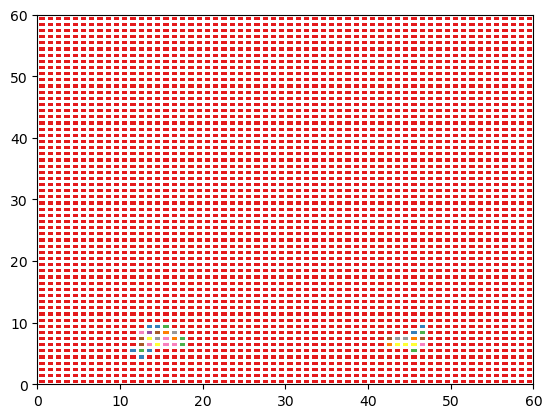

In [167]:
ax = plt.pcolormesh(one_frame(dt[2]), cmap='Set1',edgecolors='white')
plt.show()

In [168]:
print(one_frame(dt[0]).shape)

(60, 60)


In [169]:
tau_l = 5
tau_max = 10

total_time = len(dt)

infected = np.zeros(total_time)
recovering = np.zeros(total_time)
susceptible = np.zeros(total_time)

for i in range(0,total_time):
    for j in range(0, 60*60):
        if dt[i][j] ==0 :
            susceptible[i] += 1
        if (dt[i][j]>=1 and dt[i][j]<=tau_l) :
            infected[i] += 1
        if (dt[i][j]>tau_l and dt[i][j]<=tau_max) :
            recovering[i] += 1

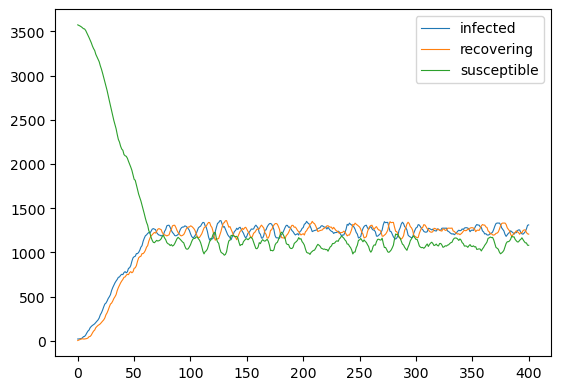

In [172]:
line_width = 0.8
ax = plt.axes(box_aspect = 0.7)

ax.plot(infected, label="infected", lw = line_width)
ax.plot(recovering, label="recovering", lw = line_width)
ax.plot(susceptible, label="susceptible", lw = line_width)
ax.legend()
plt.show()

MovieWriter Pillow unavailable; using Pillow instead.
Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x7f60946b0ae0>
Traceback (most recent call last):
  File "/home/sudeep/miniconda3/lib/python3.12/weakref.py", line 60, in _cb
    callback(self)
  File "/home/sudeep/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py", line 248, in _remove_proxy
    del self.callbacks[signal][cid]
        ~~~~~~~~~~~~~~^^^^^^^^
KeyError: 'changed'
Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x7f60982ae200>
Traceback (most recent call last):
  File "/home/sudeep/miniconda3/lib/python3.12/weakref.py", line 60, in _cb
    callback(self)
  File "/home/sudeep/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py", line 248, in _remove_proxy
    del self.callbacks[signal][cid]
        ~~~~~~~~~~~~~~^^^^^^^^
KeyError: 'changed'
Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x7f609837b4c0>
Traceback (most recent call last):
  File "

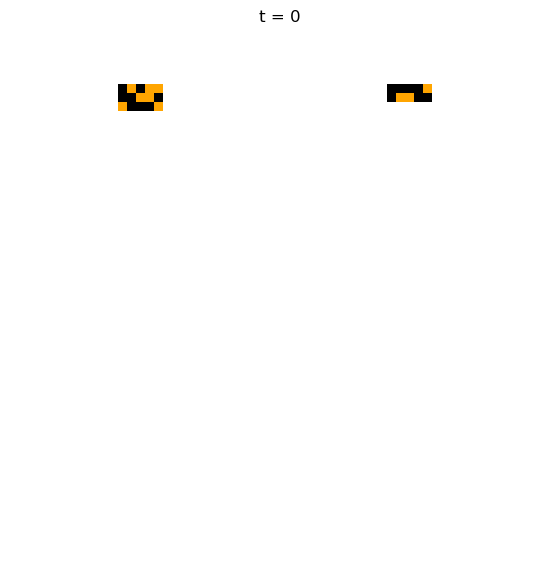

In [171]:
# Srujith's plotting animation method

# Define custom colors and normalization
cmap = ListedColormap(['white', 'black', 'orange'])
bounds = [0, 1, tau_l, tau_max]
norm = BoundaryNorm(bounds, cmap.N)

# Create the figure and axis for animation
fig, ax = plt.subplots(figsize=(7, 7))

# Function to update the plot for each frame
def update(frame):
    ax.clear() # Clear the previous image
    ax.imshow(one_frame(dt[frame]), cmap=cmap, norm=norm, interpolation='none')
    ax.set_title(f't = {frame}')
    ax.axis('off') # Optionally hide axes for a cleaner look

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(dt), interval=50) # 200ms delay
ani.save("SIRS_model.gif", writer = 'Pillow', fps = 10)